In [160]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)

In [189]:
n_samples = 100
X_train = np.array([[x] for x in np.sort(np.random.uniform(0, 1, n_samples))])
y_train = np.sin(2 * np.pi * X_train)

In [190]:
class PolynomialRegression:
    """
    Docstring
    """
    def __init__(self, degree, alpha=0.1, n_iters=100):
        self.degree = degree
        self.alpha = alpha
        self.n_iters = n_iters

    def fit(self, X, y):
        self.w_ = np.zeros((self.degree, 1))
        self.b_ = 0

        X_poly = np.hstack([X ** i for i in range(1, self.degree + 1)])
        m = X_poly.shape[0]

        for _ in range(self.n_iters):
            dJdw = np.dot(X_poly.T, ((np.dot(X_poly, self.w_) + self.b_) - y))
            dJdb = np.sum(((np.dot(X_poly, self.w_) + self.b_) - y))
            
            self.w_ = self.w_ - (2/m) * self.alpha * dJdw
            self.b_ = self.b_ - (2/m) * self.alpha * dJdb
            

    def predict(self, X):
        X_poly = np.hstack([X ** i for i in range(1, self.degree + 1)])
        y_pred = np.dot(X_poly, self.w_) + self.b_
        return y_pred

In [191]:
model = PolynomialRegression(degree=5, alpha=0.1, n_iters=10000)
model.fit(X_train, y_train)

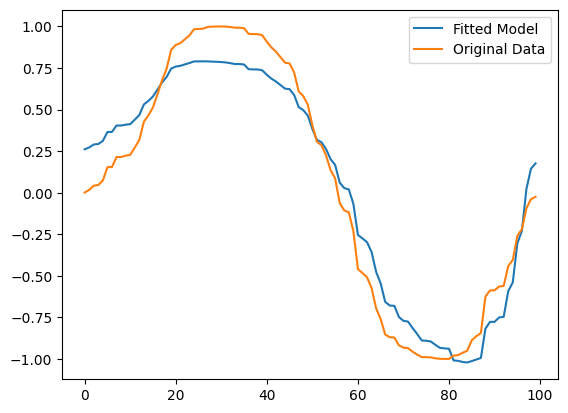

In [192]:
y_pred = model.predict(X_train)
plt.plot(y_pred, label="Fitted Model")
plt.plot(y_train, label="Original Data")
plt.legend()